<a href="https://colab.research.google.com/github/Jbaruz/Unsupervised_learning/blob/main/1_PCA_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created on Tue Sep 19 13:33:19 2023

@author: Jbaru

In [17]:
#import the necessary libraries
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA
import numpy as np
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [18]:
# 1. Load the MNIST dataset.
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X_train, y_train = mnist.data, mnist.target
print(mnist.data.shape)


(70000, 784)


In [19]:
# 2. Display each digit.

# Find the first index for each digit using numpy operations
unique_indices = [np.argmax(y_train == str(digit)) for digit in range(10)]

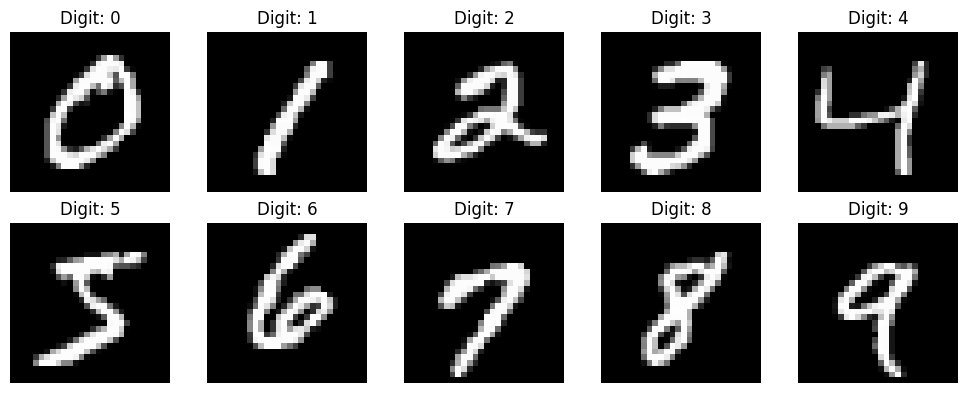

In [20]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for idx, ax in zip(unique_indices, axes.ravel()):
    ax.imshow(X_train[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"Digit: {y_train[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [21]:
# 3. Use PCA to retrieve the 1st and 2nd principal component and output their explained variance ratio.
n_components = 2  # Number of principal components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_train)
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.09746116 0.07155445]


Pr: 	to find out the first two component doesn't mean that you have to use two components only (unless specified)

In [34]:
from sklearn.decomposition import PCA

# Perform PCA without specifying the number of components
pca_full = PCA() # By default, PCA() keeps all components
X_pca_full = pca_full.fit_transform(X_train)

# Retrieve the explained variance ratio for all components
explained_variance_ratio_full = pca_full.explained_variance_ratio_

# Output the explained variance ratio for the first two principal components
print(f"Explained variance ratio of the first component: {explained_variance_ratio_full[0]*100:.2f}%")
print(f"Explained variance ratio of the second component: {explained_variance_ratio_full[1]*100:.2f}%")


Explained variance ratio of the first component: 9.75%
Explained variance ratio of the second component: 7.16%


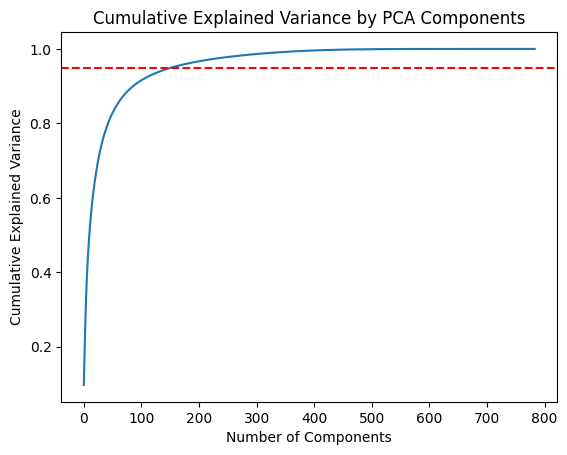

In [35]:
import matplotlib.pyplot as plt

# Assuming 'pca_full' is your fitted PCA object
cumulative_variance_ratio = np.cumsum(pca_full.explained_variance_ratio_)
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')

# Draw a line at the desired threshold, e.g., 0.95 for 95% variance.
plt.axhline(y=0.95, color='r', linestyle='--')

plt.show()


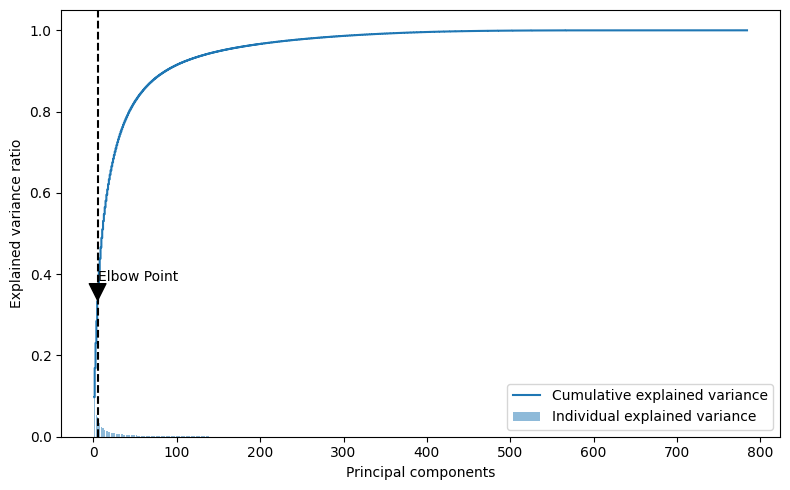

In [36]:
import matplotlib.pyplot as plt

# Fit PCA on the training data
pca = PCA().fit(X_train)

# Calculate the explained variance for each component
explained_variance = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot the explained variance and the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')

# Highlight the "elbow" point, which may be the number of components to retain
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

# Annotate the elbow point: you may need to visually identify it first and then annotate
# Example: if you determine the elbow is at the 5th component:
plt.axvline(x=5, color='k', linestyle='--', label='Elbow Point')
plt.annotate('Elbow Point', xy=(5, cumulative_explained_variance[4]), xytext=(5, cumulative_explained_variance[4]+0.05), arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


In [37]:
# Fit PCA on the training data
pca = PCA().fit(X_train)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine how many components to retain by setting a threshold
variance_threshold = 0.95 # For example, if you want to retain 95% of the variance
components_retained = np.argmax(cumulative_explained_variance >= variance_threshold) + 1  # Add 1 because np.argmax returns the index, which starts at 0

print(f"Number of components to retain for {variance_threshold*100}% variance: {components_retained}")


Number of components to retain for 95.0% variance: 154


In [38]:
# 4. Plot the projections of the 1st and 2nd principal component onto a 1D plane.
# Define the unit vector for projection
projection_vector = np.array([1, 1]) / np.sqrt(2)

# Project the PCA-transformed data onto the 1D hyperplane
projection_1D = np.dot(X_pca, projection_vector)

# Convert labels to integers
y_int = np.array(y_train, dtype=int)

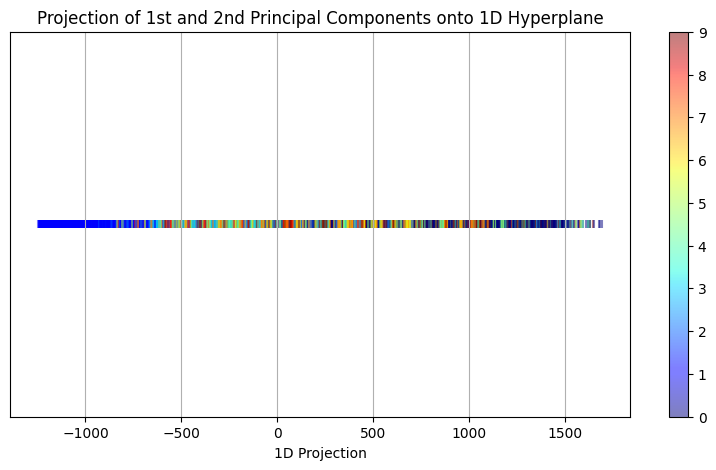

In [39]:
# Plot the 1D projection
plt.figure(figsize=(10, 5))
plt.scatter(projection_1D, [0] * len(projection_1D), c=y_int, cmap='jet', alpha=0.5, marker='|')
plt.colorbar(ticks=range(10))
plt.title('Projection of 1st and 2nd Principal Components onto 1D Hyperplane')
plt.xlabel('1D Projection')
plt.yticks([])  # Remove the y-axis ticks
plt.grid(True, which='both', axis='x')
plt.show()

Pr: The one dimentional projection is usually a histogram, you can also try using scatterplot instead

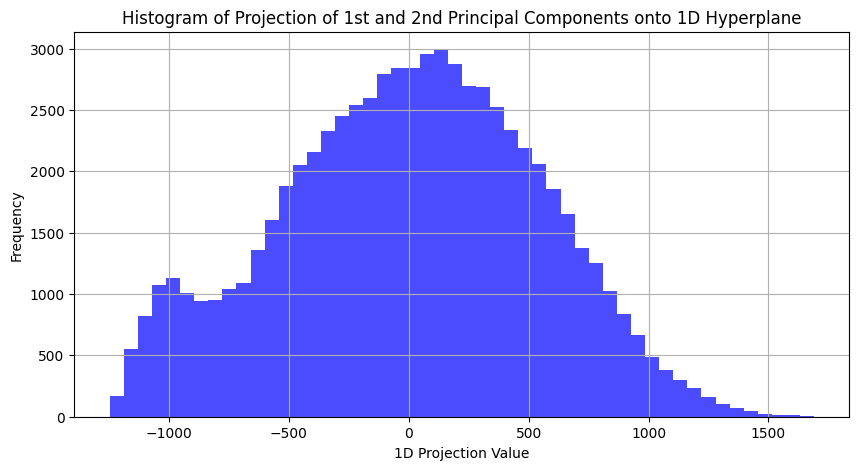

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_pca and y_train are defined and PCA has already been performed
# Define the unit vector for projection as in your code
projection_vector = np.array([1, 1]) / np.sqrt(2)

# Project the PCA-transformed data onto the 1D hyperplane
projection_1D = np.dot(X_pca, projection_vector)

# Convert labels to integers if necessary (assuming y_train is categorical)
y_int = np.array(y_train, dtype=int)

# Plot the histogram of the 1D projection
# You can decide on the number of bins, or remove the parameter to use the default
plt.figure(figsize=(10, 5))
plt.hist(projection_1D, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Projection of 1st and 2nd Principal Components onto 1D Hyperplane')
plt.xlabel('1D Projection Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


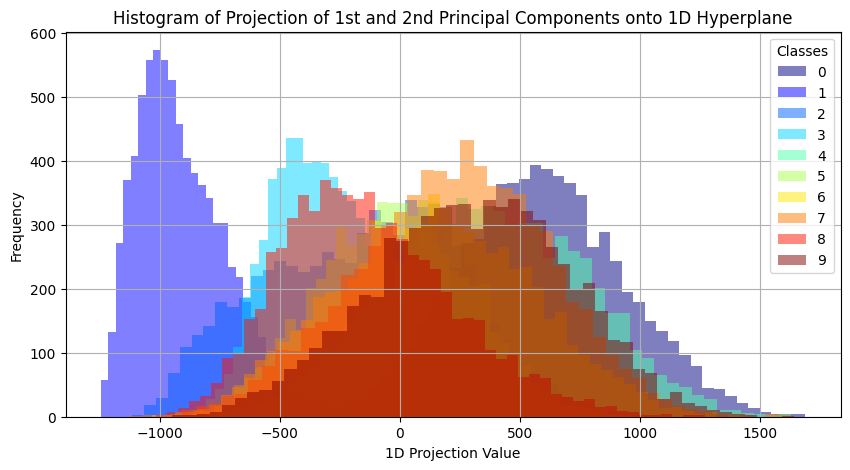

In [41]:
# Define colors or use a colormap for plotting different classes
colors = plt.cm.jet(np.linspace(0, 1, len(np.unique(y_int))))

plt.figure(figsize=(10, 5))

# Loop over the unique labels and plot histograms for each class
for label, color in zip(np.unique(y_int), colors):
    # Select the projections corresponding to the current label
    projection_of_class = projection_1D[y_int == label]
    plt.hist(projection_of_class, bins=50, color=color, alpha=0.5, label=str(label))

plt.title('Histogram of Projection of 1st and 2nd Principal Components onto 1D Hyperplane')
plt.xlabel('1D Projection Value')
plt.ylabel('Frequency')
plt.legend(title='Classes')
plt.grid(True)
plt.show()


In [42]:
# 5. Use Incremental PCA to reduce the dimensionality of the MNIST dataset down to 154 dimensions.

# Initialize IncrementalPCA
inc_pca = IncrementalPCA(n_components=154, batch_size=200)
X_reduced = inc_pca.fit_transform(X_train)

# Print the shape of the reduced dataset to confirm it's 154 dimensions
print(X_reduced.shape)

(70000, 154)


In [43]:
# 6. Display the original and compressed digits from (5).

# Number of digits to display
n_digits = 5

# Get the first n_digits from the dataset
X_original_subset = X_train[:n_digits]
X_reduced_subset = X_reduced[:n_digits]

# Reconstruct the images from the compressed data
X_reconstructed = inc_pca.inverse_transform(X_reduced_subset)

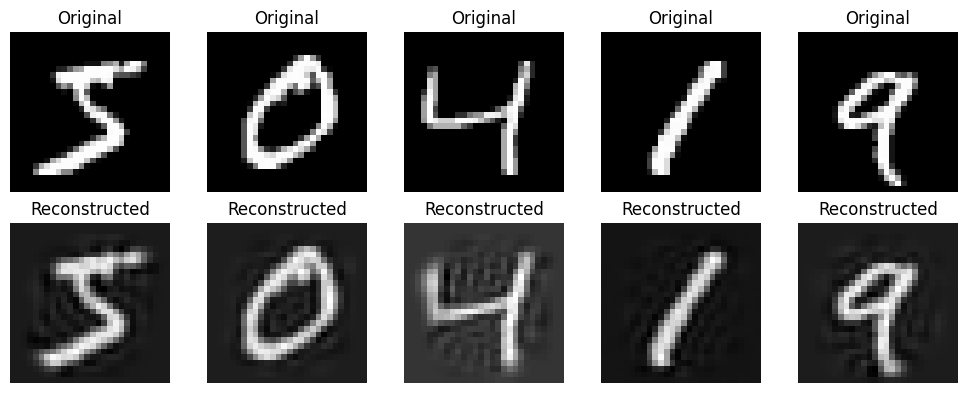

In [44]:
plt.figure(figsize=(10, 4))

for i in range(n_digits):
    # Original Image
    plt.subplot(2, n_digits, i + 1)
    plt.imshow(X_original_subset[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Reconstructed (Compressed) Image
    plt.subplot(2, n_digits, i + 1 + n_digits)
    plt.imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()